In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.interpolate import splrep, splev, BSpline, CubicSpline
from sklearn.model_selection import KFold
import warnings
import itertools
warnings.filterwarnings("ignore")
np.random.seed(1)
from ISLP.models import (poly,ModelSpec as MS)
from ISLP.transforms import NaturalSpline
from ISLP.transforms import BSpline
from ISLP import load_data , confusion_table
from sklearn.model_selection import KFold
from pygam import LinearGAM, s
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                     
                          
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                            log_loss)
from sklearn.ensemble import \
    (RandomForestRegressor as RF,
     GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
def performance_metrics(Y_test, Y_pred):
    print(classification_report(Y_test, Y_pred)) 
    confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)  
    cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1])
  
    cm_display.plot()
    plt.show()

## Problem 1 

## a

In [2]:
import numpy as np
data_points = 100
size = np.random.normal(1500, 300,data_points)
bedrooms = np.random.choice([1, 2, 3, 4, 5],data_points)
age = np.random.normal(20, 5, data_points)
renovation_prob = 0.3
renovation = np.random.binomial(1, renovation_prob, data_points)
noise_level = np.random.choice(range(1, 11),data_points)
price = size * 100 + bedrooms * 5000 - age * 200 + renovation * 10000 + noise_level * 500
prob_success = 1 / (1 + np.exp(166750 - price))
Y = np.random.binomial(1, prob_success,data_points)

In [3]:
X = pd.DataFrame(np.column_stack((size, bedrooms, age,renovation, noise_level)), columns = ['size','bedrooms','age','renovation','noise_level'])
Y = pd.DataFrame(Y, columns = ['prob_price'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## b

In [4]:
model = DecisionTreeClassifier(random_state=1) 
ccp_path = model.cost_complexity_pruning_path(X_train, y_train)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy"],
    'ccp_alpha': ccp_path.ccp_alphas
}
kfold = skm.KFold(5,shuffle=True,random_state=1)
grid = skm.GridSearchCV(model,params, refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)
y_pred = grid.predict(X_test)

Best Parameters: {'ccp_alpha': 0.02385638297872339, 'criterion': 'gini', 'max_depth': 3}

Best Score: 0.925


## Training Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.94      0.98      0.96        45

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



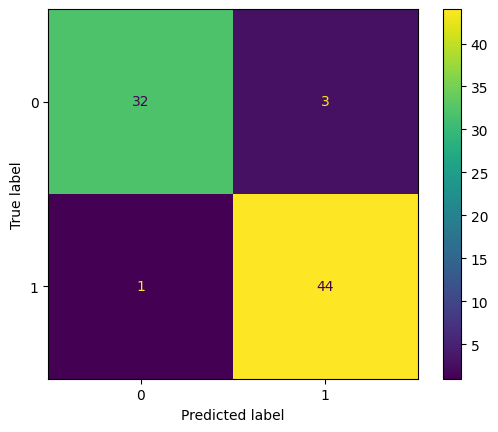

In [5]:
performance_metrics(y_train, grid.predict(X_train))

## Testing Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.57      0.80      0.67         5

    accuracy                           0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20



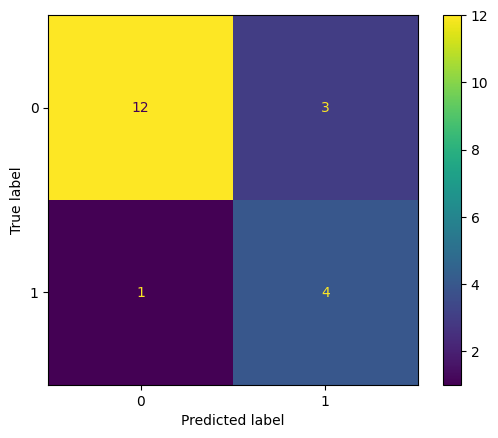

In [6]:
performance_metrics(y_test, y_pred)

## c

In [7]:
model = RandomForestClassifier(random_state= 1)
params = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7]
}
kfold = skm.KFold(5,shuffle=True,random_state=1)
grid = skm.GridSearchCV(model,params, refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)
y_pred = grid.predict(X_test)

Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}

Best Score: 0.9375


## Training Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



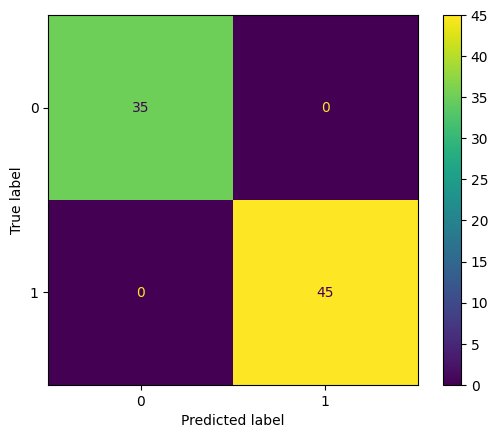

In [8]:
performance_metrics(y_train, grid.predict(X_train))

## Test Confusion Matrix

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.67      0.80      0.73         5

    accuracy                           0.85        20
   macro avg       0.80      0.83      0.81        20
weighted avg       0.86      0.85      0.85        20



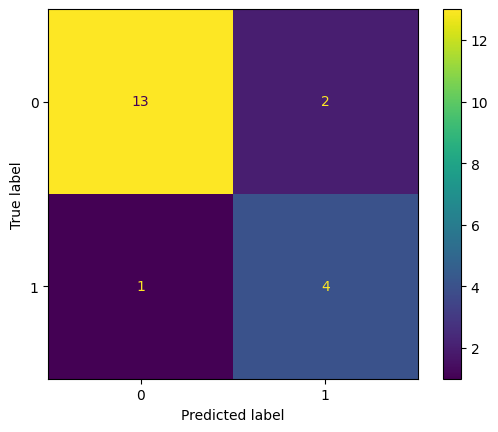

In [9]:
performance_metrics(y_test, y_pred)

## d

In [10]:
model = AdaBoostClassifier(random_state= 1)
params = { 
    'n_estimators': [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]}
kfold = skm.KFold(5,shuffle=True,random_state=1)
grid = skm.GridSearchCV(model,params, refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)
y_pred = grid.predict(X_test)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 10}

Best Score: 0.9375


## Training Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.94      0.98      0.96        45

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



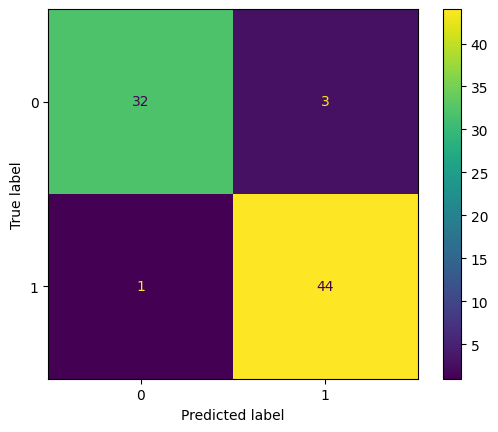

In [11]:
performance_metrics(y_train, grid.predict(X_train))

## Test Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.57      0.80      0.67         5

    accuracy                           0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20



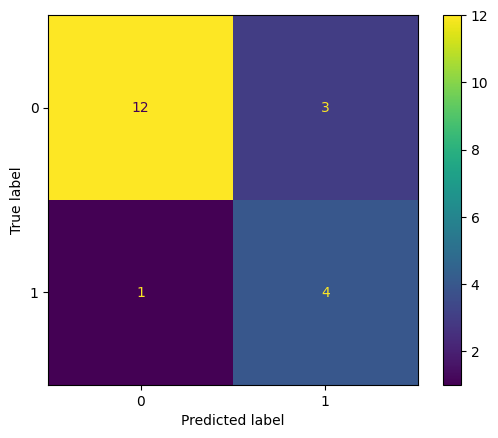

In [12]:
performance_metrics(y_test, y_pred)

## Problem 2

In [13]:
Carseats = load_data('Carseats')
Carseats.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [14]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [15]:
category_columns =  Carseats.select_dtypes(include='category').keys()
final_data = pd.get_dummies(Carseats, columns = category_columns)
final_data.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.5,138,73,11,276,120,42,17,1,0,0,0,1,0,1


In [16]:
encoder = OrdinalEncoder()
Carseats[category_columns] = encoder.fit_transform(Carseats[category_columns])
final_data= Carseats
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    float64
 10  US           400 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 34.5 KB


In [17]:
y = final_data['Sales']
X = final_data.drop('Sales', axis = 1)

## a

### Full Depth

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regression_tree_full = DecisionTreeRegressor(random_state = 1) 
regression_tree_full.fit(X_train, y_train)
y_pred = regression_tree_full.predict(X_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R Squared Score is:", r2_score(y_test, y_pred))

Mean Squared Error: 6.820788333333334
R Squared Score is: 0.13110398534419132


### Pruned

In [42]:
reg = DecisionTreeRegressor(random_state = 1) 
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
params = {'ccp_alpha': ccp_path.ccp_alphas}
kfold = skm.KFold(5,shuffle=True,random_state=1)
grid = skm.GridSearchCV(reg,params, refit=True,cv=kfold,scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)
y_pred = grid.predict(X_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R Squared Score is:", r2_score(y_test, y_pred))

Best Parameters: {'ccp_alpha': 0.17094105443821306}

Best Score: -4.406681074359779
Mean Squared Error: 5.398885162326548
R Squared Score is: 0.31223935242139667


### Depth for Full Tree

In [43]:
print('Number of terminal Nodes for Full Tree = ', regression_tree_full.get_n_leaves())

Number of terminal Nodes for Full Tree =  279


## Depth for Pruned Tree

Number of terminal Nodes for Pruned Tree =  7


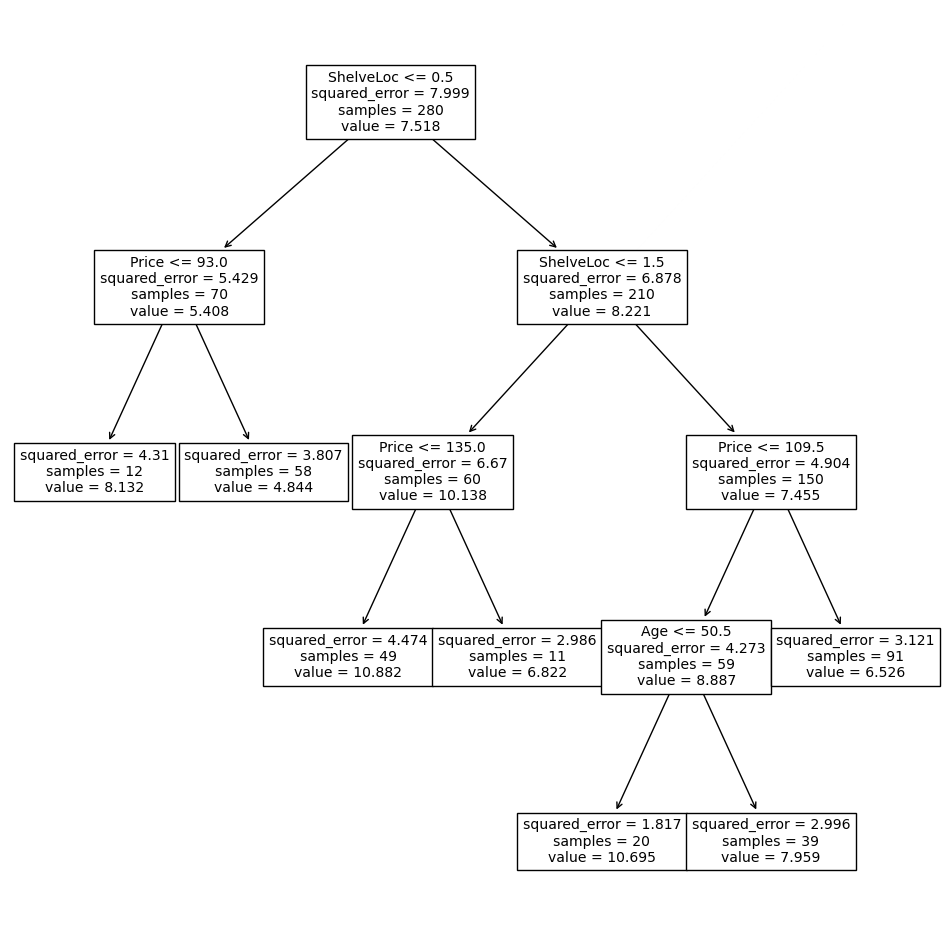

In [46]:
print('Number of terminal Nodes for Pruned Tree = ', grid.best_estimator_.get_n_leaves())
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=X.columns,
          ax=ax);

## b

In [22]:
rfr = RandomForestRegressor(n_estimators = 500, random_state = 1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [23]:
y_pred = rfr.predict(X_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R Squared Score is:", r2_score(y_test, y_pred))

Mean Squared Error: 3.061852784803338
R Squared Score is: 0.6099524641196055


### Hyperparamter tuning for Random forest regressor to improve performance using cross validation

In [24]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
}

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}

Best Score: -3.3625246674385734


In [25]:
y_pred = grid.predict(X_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R Squared Score is:", r2_score(y_test, y_pred))

Mean Squared Error: 3.430570753737743
R Squared Score is: 0.5629817097020557


## c

In [26]:
X.shape

(400, 10)

In [27]:
m = []
mse = []
for i in range(X.shape[1]):
    model = RandomForestRegressor(max_features=i+1,random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    m.append(i)
    mse.append(metrics.mean_squared_error(y_test, y_pred))
    

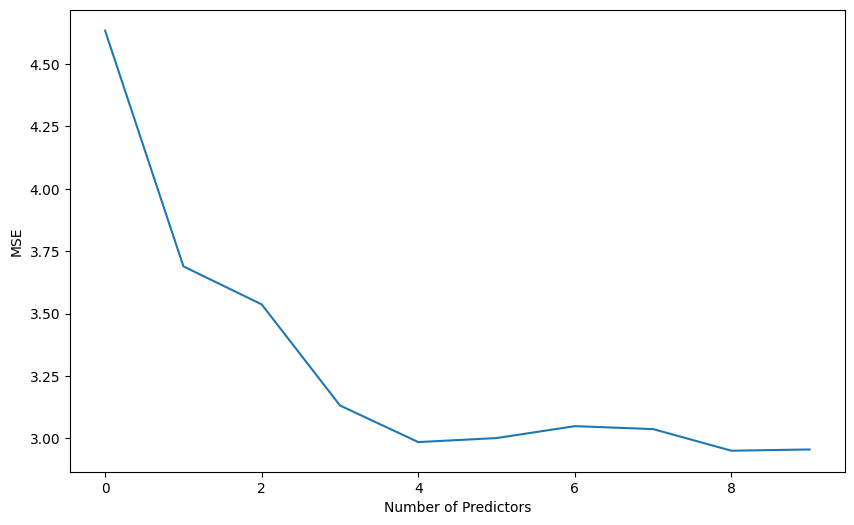

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(m, mse)
plt.xlabel('Number of Predictors')
plt.ylabel('MSE')
plt.show()

### m = √p

In [29]:
m = round(np.sqrt(X.shape[1]))
model = RandomForestRegressor(max_features=m,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

3.5371289452499983

In [30]:
feature_names = list(X.columns)
feature_imp = pd.DataFrame( {'importance':model.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
Price,0.235035
ShelveLoc,0.205205
Age,0.115144
Advertising,0.108380
CompPrice,0.100975
Income,0.082297
Population,0.076371
Education,0.048760
US,0.016968
Urban,0.010865


## d

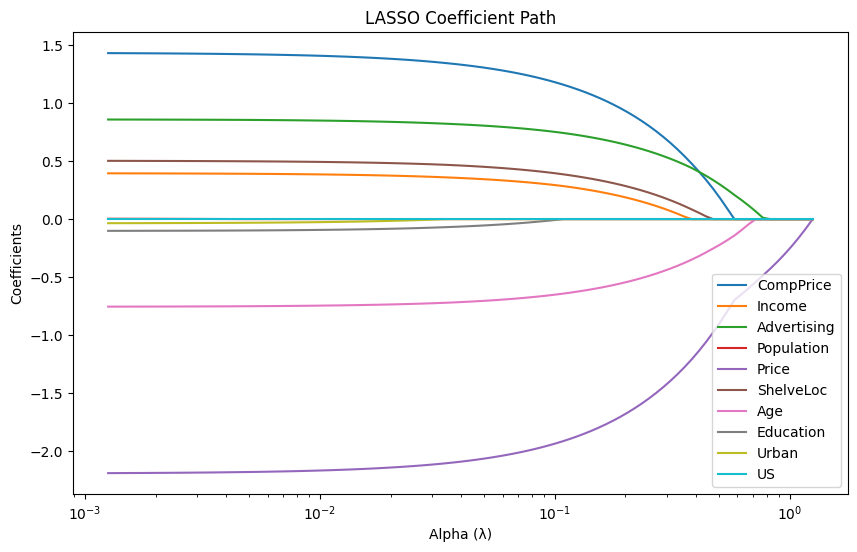

In [31]:
from sklearn.linear_model import lasso_path
y = final_data['Sales']
X = final_data.drop('Sales', axis = 1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
alphas, coefs, _ = lasso_path(X, y)
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs.T)
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficient Path')
plt.legend(X.columns, loc = 'lower right')
plt.show()

The plot is almost in coherence with results from the feature importance plot where the most important features converge to zero only when the λ is too high. Rest of the features which are less important converge to zero at a lower value of λ. This is because the highest coefficients will only converge when the penalty due to regularization becomes very high at which the model will become underfit.